# ARIMA

We learn one last forecasting model, ARIMA.

## What we will accomplish

In this notebook we will:
- Touch on autoregressive models,
- Combine autoregressive models with moving average models and differencing,
- Introduce the ARIMA model,
- Mention why stationarity is important and
- Demonstrate how to fit an ARIMA model in python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from seaborn import set_style
set_style("whitegrid")

ARIMA models consist of three key components, we touched on the first of these, moving average models, in our `Averaging and Smoothing` notebook. A component we have not discussed are autoregressive models.

## Autoregressive (AR) models

An <i>autoregressive model</i> is one in which you regress onto previous observations of the time series. Specifically if $\left\lbrace y_t \right\rbrace$ is a time series then an autoregressive model of order $p$ is:

$$
y_t = \alpha_1 y_{t-1} + \dots + \alpha_{p} y_{t-p} + \epsilon_t,
$$

where $\alpha_i$ are parameters to be fit and $\epsilon_t$ is random noise. We sometimes denote this as an $\text{AR}(p)$ process.

In the case when $p=1$ we have:

$$
y_t = \alpha y_{t-1} + \epsilon_t,
$$

which is known as a Markov process.

We will not explicitly demonstrate how to fit autoregressive models in python because it is a special case of an ARIMA model.

## Moving Average (MA) models

The statistical model underlying an $\text{MA}(q)$ forecast is:

$$
y_t = \beta_0 \epsilon_t + \beta_1 \epsilon_{t-1} + \dots + \beta_q \epsilon_{t-q},
$$

where $\left\lbrace \epsilon_t \right\rbrace$ is a sequence of independent identically distributed random variables with mean zero and a set variance.

## Autoregressive Moving Average (ARMA) models

Combining an $\text{AR}(p)$ and $\text{MA}(q)$ sequence gives an $\text{ARMA}(p,q)$ process, that is:

$$
y_t = \alpha_1 y_{t-1} + \dots + \alpha_{p} y_{t-p} + \beta_0 \epsilon_t + \beta_1 \epsilon_{t-1} + \dots + \beta_q \epsilon_{t-q}.
$$

From this we can see that if $p=0$, then we have a $\text{MA}(q)$ process, while if $q=0$ we have an $\text{AR}(p)$ process.

We should note that any $\text{ARMA}(p,q)$ process is a stationary time series. If the time series you are attempting to forecast <b>is not</b> stationary, it will not give a good fit or forecast in the long run. This leads to the final component of the ARIMA model.

## Autoregressive Integrated Moving Average (ARIMA) models

In our `Stationarity and Autocorrelation` notebook we demonstrated how differencing can be used to produce a stationary time series from a non-stationary one. Differencing is thus the third component of the Autoregressive Integrated Moving Average (ARIMA) model. 

An ARIMA model first performs differencing on the original time series and then fits an ARMA model to that differenced series. In practice we say that we are fitting an $\text{ARIMA}(p,d,q)$ model. Here $p$ references the number of $\text{AR}$ terms, $q$ references the number of $\text{MA}$ terms and $d$ the number of differences you applied to the original time series.

### In python

We can fit such a model using `statsmodels`'s `SARIMAX` model object, <a href="https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html">https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html</a>.

<i>Note: we use this model object because it is the more general version of the ARIMA model that can accomodate seasonal data. Also it allows us to set the maximum number of iterations on the fitting algorithm.</i>

In [2]:
## Import SARIMAX from tsa.api
from statsmodels.tsa.api import SARIMAX

In [3]:
## Load the google data
goog = pd.read_csv("../../data/google_stock.csv", parse_dates=['date'])

In [4]:
## train test split
goog_train = goog.iloc[:-14].copy()
goog_test = goog.iloc[-14:].copy()

In [5]:
## Making and fitting the model
## Call SARIMAX
## then the training data
## then give the order here we choose (5,1,5)
## call .fit, I have increased the number of iterations
## for the fitting algorithm, with maxiter
arima = SARIMAX(goog_train.closing_price.values,
                   order=(5, 1, 5)).fit(maxiter=200)

/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/Caskroom/miniforge/base/envs/erdos_sp_2024/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16728D+00    |proj g|=  5.88882D-02

At iterate    5    f=  4.16260D+00    |proj g|=  1.51101D-02

At iterate   10    f=  4.16069D+00    |proj g|=  2.52434D-03

At iterate   15    f=  4.16043D+00    |proj g|=  9.95182D-03

At iterate   20    f=  4.16010D+00    |proj g|=  1.36794D-03

At iterate   25    f=  4.15990D+00    |proj g|=  9.65132D-03

At iterate   30    f=  4.15983D+00    |proj g|=  1.29525D-03

At iterate   35    f=  4.15962D+00    |proj g|=  2.01855D-02

At iterate   40    f=  4.15882D+00    |proj g|=  9.90672D-02

At iterate   45    f=  4.15737D+00    |proj g|=  2.54973D-02

At iterate   50    f=  4.15701D+00    |proj g|=  1.06973D-02

At iterate   55    f=  4.15674D+00    |proj g|=  1.00039D-01

At iterate   60    f=  4.15668D+00    |proj g|=  2.70459D-03

At iterate   65    f=  4.1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


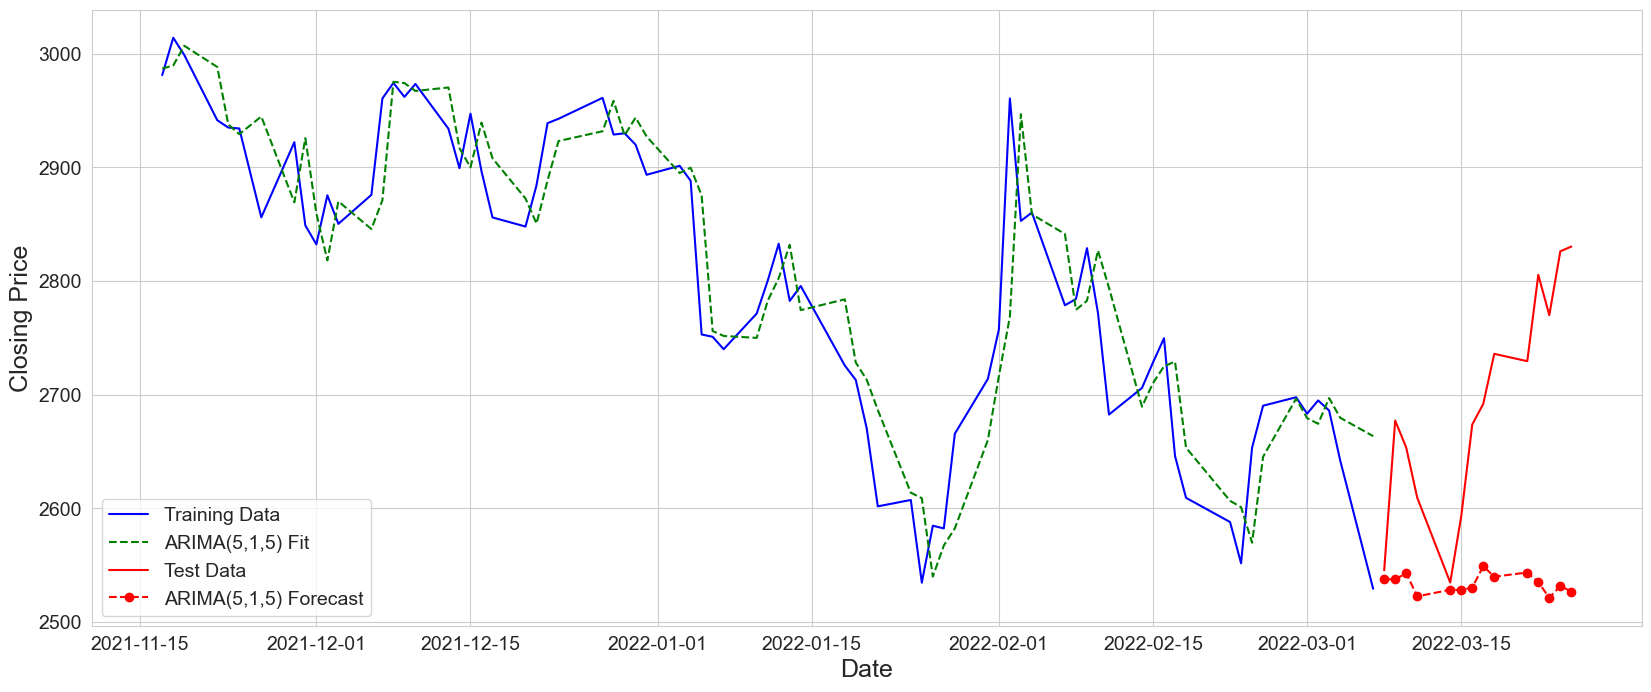

In [6]:
plt.figure(figsize=(20,8))


plt.plot(goog_train.date[-75:], 
         goog_train.closing_price[-75:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(goog_train.date[-75:], 
         arima.fittedvalues[-75:],
         'g--',
         label="ARIMA(5,1,5) Fit")

plt.plot(goog_test.date, 
         goog_test.closing_price,
         'r',
         label="Test Data")

## We can get the forecast with .forecast(h)
plt.plot(goog_test.date, 
         arima.forecast(14),
         'r--o',
         label="ARIMA(5,1,5) Forecast")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

This is how to make an ARIMA forecast is python. The procedure of choosing the correct parameters will be covered in greater depth in a `Problem Session` notebook.

Also we can extend the ARIMA model for seasonal data, but we leave the details to the corresponding `Practice Problems` notebook.

# Next Steps for Time Series

This is our final notebook on time series!

We have touched on some of the most basic concepts regarding time series analysis and forecasting. While we do present additional content in the time series `Problem Sessions` and `Practice Problems` notebooks, you may wish to get more detailed information on this subject.

Some useful books are:

1. <a href="http://site.iugaza.edu.ps/nbarakat/files/2010/02/Analysis_of_Time_Series_An_Introduction.pdf">The Analysis of Time Series</a>, by Chris Chatfield

2. <a href="https://mybiostats.files.wordpress.com/2015/03/time-series-analysis-and-its-applications-with-examples-in-r.pdf">Time Series Analysis & its Applications</a>, by Robert H. Shumway and David S. Stoffer.

3. <a href="https://otexts.com/fpp3/">Forecasting: Principles and Practice</a>, by Rob J Hyndman and George Athanasopoulos.

4. Forecasting with Exponential Smoothing: The State Space Approach, by Rob Hyndman, Anne B. Koehler, J. Keith Ord, Ralph D. Snyder

5. Time Series Analysis by James D. Hamilton

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)